In [7]:
import os 
import tensorflow as tf

In [8]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,LSTM
from tensorflow.keras.models import Sequential,load_model

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [10]:
cv2.imread("/Users/godfather_101/Downloads/human detection dataset/train/0/0.png").shape

(2992, 2992, 3)

In [11]:
os.makedirs("train",exist_ok=True)
os.makedirs("test",exist_ok=True)

### Data Preprocessing

In [12]:
train_gen = ImageDataGenerator(rescale=1./255,horizontal_flip=True,shear_range = True,zoom_range=True,rotation_range=2,vertical_flip=True)

In [13]:
train_set = train_gen.flow_from_directory("/Users/godfather_101/Downloads/human detection dataset/train",
batch_size=32,
target_size=(128,128),
class_mode="binary")

Found 761 images belonging to 2 classes.


In [14]:
test_gen = ImageDataGenerator(rescale=1./255)

In [15]:
test_set = test_gen.flow_from_directory("/Users/godfather_101/Downloads/human detection dataset/test",
batch_size=32,
target_size=(128,128),
class_mode="binary")

Found 162 images belonging to 2 classes.


### Model

In [36]:
model = Sequential()
model.add(Conv2D(128,(3,3),input_shape=(128,128,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 128)       0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 63, 63, 128)       512       
 chNormalization)                                                
                                                                 
 flatten_2 (Flatten)         (None, 508032)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               65028224  
                                                                 
 dense_5 (Dense)             (None, 1)                

In [37]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=.01),loss= BinaryCrossentropy(),metrics=["accuracy"])


In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
callbacks_list = [EarlyStopping(monitor="val_accuracy",patience=10),
ModelCheckpoint(monitor="accuracy",filepath="model.h5",save_best_only=True,verbose=0)]

In [39]:
history = model.fit(train_set,epochs=20,steps_per_epoch=2,validation_data=(test_set),callbacks=callbacks_list,validation_steps=2)

Epoch 1/20
2/2 [==============================] - 7s 5s/step - loss: 230.2744 - accuracy: 0.6250 - val_loss: 48.0751 - val_accuracy: 0.7031
Epoch 2/20
2/2 [==============================] - 5s 3s/step - loss: 349.9464 - accuracy: 0.4219 - val_loss: 9.5823 - val_accuracy: 0.4219
Epoch 3/20
2/2 [==============================] - 5s 4s/step - loss: 118.9527 - accuracy: 0.4375 - val_loss: 21.1675 - val_accuracy: 0.6875
Epoch 4/20
2/2 [==============================] - 5s 3s/step - loss: 66.7654 - accuracy: 0.4688 - val_loss: 0.7380 - val_accuracy: 0.5312
Epoch 5/20
2/2 [==============================] - 5s 3s/step - loss: 30.9389 - accuracy: 0.5469 - val_loss: 1.6564 - val_accuracy: 0.2656
Epoch 6/20
2/2 [==============================] - 5s 3s/step - loss: 7.9587 - accuracy: 0.3906 - val_loss: 0.6993 - val_accuracy: 0.3281
Epoch 7/20
2/2 [==============================] - 5s 3s/step - loss: 4.0952 - accuracy: 0.3594 - val_loss: 0.6996 - val_accuracy: 0.2812
Epoch 8/20
2/2 [===============

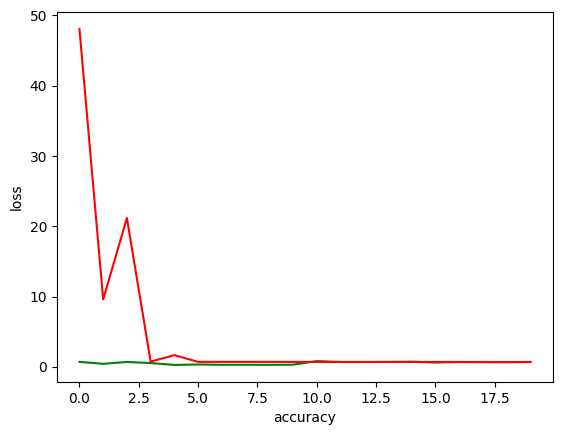

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_accuracy"],color="g")
plt.plot(history.history["val_loss"],color="r")
plt.xlabel("accuracy")
plt.ylabel("loss")
plt.show()

In [41]:
model = load_model("/Users/godfather_101/Downloads/human detection dataset/model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 128)       0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 63, 63, 128)       512       
 chNormalization)                                                
                                                                 
 flatten_2 (Flatten)         (None, 508032)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               65028224  
                                                                 
 dense_5 (Dense)             (None, 1)                

In [42]:
model.evaluate(test_set)

6/6 [==============================] - 4s 606ms/step - loss: 0.6840 - accuracy: 0.6975


[0.6840398907661438, 0.6975308656692505]

In [43]:
import pickle
with open("HumanDetectionModel.pkl","wb") as file:
    pickle.dump(model,file)

In [44]:
import joblib
joblib.dump(model,"Model")

['Model']